In [ ]:
# https://scikit-learn.org/stable/auto_examples/neighbors/plot_classification.html
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

# **Conjunto de dados Iris**


In [ ]:
iris = load_iris(as_frame=True)
X = iris.data[["sepal length (cm)", "sepal width (cm)"]]
y = iris.target
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=0)

In [ ]:
X_train

,sepal length (cm),sepal width (cm)
60,5.0,2.0
1,4.9,3.0
8,4.4,2.9
93,5.0,2.3
106,4.9,2.5
...,...,...
66,5.6,3.0
29,4.7,3.2
130,7.4,2.8
141,6.9,3.1


# **k-NN com padronização e k = 11**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

In [ ]:
clf = Pipeline(
    steps=[("scaler", StandardScaler()), ("knn", KNeighborsClassifier(n_neighbors=11))]
)

# Verificar as fronteiras de decisão com e sem ponderação

Observamos que o parâmetro pesos têm impacto no limite de decisão. Quando pesos="unifom" todos os vizinhos mais próximos terão o mesmo impacto na decisão. Já quando pesos="distância" o peso dado a cada vizinho é proporcional ao inverso da distância desse vizinho ao exemplo sendo classificado.

In [ ]:
import matplotlib.pyplot as plt
from sklearn.inspection import DecisionBoundaryDisplay

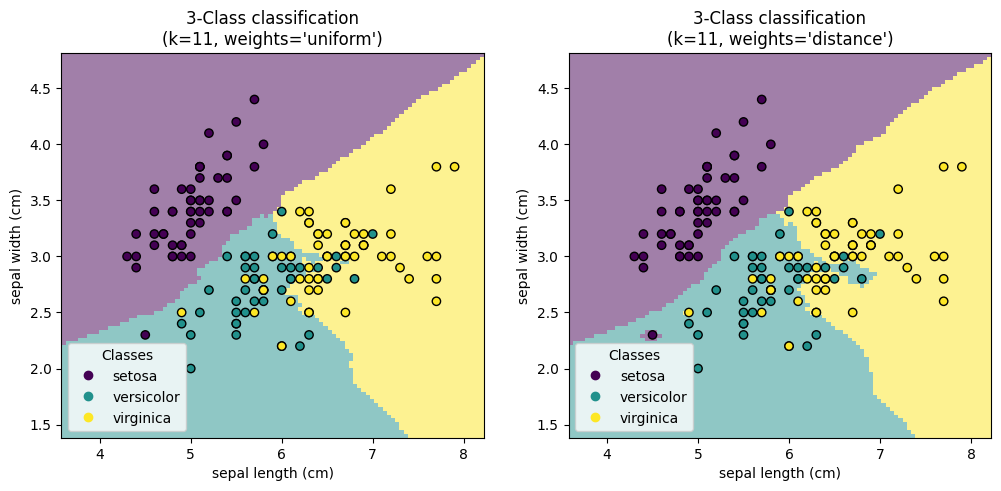

In [ ]:
_, axs = plt.subplots(ncols=2, figsize=(12, 5))

for ax, weights in zip(axs, ("uniform", "distance")):
    clf.set_params(knn__weights=weights).fit(X_train, y_train)
    disp = DecisionBoundaryDisplay.from_estimator(
        clf,
        X_test,
        response_method="predict",
        plot_method="pcolormesh",
        xlabel=iris.feature_names[0],
        ylabel=iris.feature_names[1],
        shading="auto",
        alpha=0.5,
        ax=ax,
    )
    scatter = disp.ax_.scatter(X.iloc[:, 0], X.iloc[:, 1], c=y, edgecolors="k")
    disp.ax_.legend(
        scatter.legend_elements()[0],
        iris.target_names,
        loc="lower left",
        title="Classes",
    )
    _ = disp.ax_.set_title(
        f"3-Class classification\n(k={clf[-1].n_neighbors}, weights={weights!r})"
    )

plt.show()

# Como escolher o melhor valor de k?

**Padroniza os dados**

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

**Escolhe o melhor valor de k com validação cruzada**

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
# Validação cruzada com diferentes valores de k
k_valores = [1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21, 23, 25]
cv_scores = []

for k in k_valores:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_scaled, y, cv=10, scoring='accuracy')
    cv_scores.append(scores.mean())

# Pega o k ótimo
optimal_k = k_valores[cv_scores.index(max(cv_scores))]

In [ ]:
cv_scores

[0.7200000000000001,
 0.72,
 0.7533333333333333,
 0.7666666666666667,
 0.76,
 0.7466666666666667,
 0.7666666666666668,
 0.78,
 0.76,
 0.78,
 0.8,
 0.7866666666666667,
 0.7733333333333332]

In [ ]:
optimal_k

21

**Repete o experimento com o k ótimo e com o k igual a 11, ambos com ponderação**

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

3-Class classification
(k=11, weights='distance')
[[13  0  0]
 [ 0  7  6]
 [ 0  8  4]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       0.47      0.54      0.50        13
           2       0.40      0.33      0.36        12

    accuracy                           0.63        38
   macro avg       0.62      0.62      0.62        38
weighted avg       0.63      0.63      0.63        38

3-Class classification
(k=21, weights='distance')
[[13  0  0]
 [ 0  7  6]
 [ 0  8  4]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       0.47      0.54      0.50        13
           2       0.40      0.33      0.36        12

    accuracy                           0.63        38
   macro avg       0.62      0.62      0.62        38
weighted avg       0.63      0.63      0.63        38



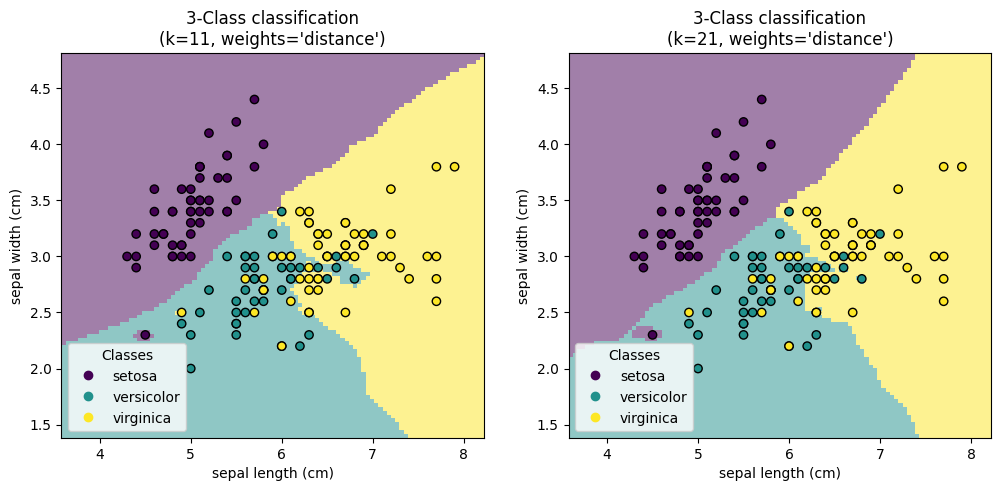

In [ ]:
_, axs = plt.subplots(ncols=2, figsize=(12, 5))
weights = "distance"

for ax, n_neighbors in zip(axs, (11, optimal_k)):
    clf = Pipeline(steps=[("scaler", StandardScaler()), ("knn", KNeighborsClassifier(n_neighbors=n_neighbors))])
    clf.set_params(knn__weights=weights).fit(X_train, y_train)

    # Predição
    print(f"3-Class classification\n(k={clf[-1].n_neighbors}, weights={weights!r})")
    predicoes = clf.predict(X_test)
    print(confusion_matrix(y_test, predicoes))
    print(classification_report(y_test, predicoes))

    disp = DecisionBoundaryDisplay.from_estimator(
        clf,
        X_test,
        response_method="predict",
        plot_method="pcolormesh",
        xlabel=iris.feature_names[0],
        ylabel=iris.feature_names[1],
        shading="auto",
        alpha=0.5,
        ax=ax,
    )
    scatter = disp.ax_.scatter(X.iloc[:, 0], X.iloc[:, 1], c=y, edgecolors="k")
    disp.ax_.legend(
        scatter.legend_elements()[0],
        iris.target_names,
        loc="lower left",
        title="Classes",
    )
    _ = disp.ax_.set_title(
        f"3-Class classification\n(k={clf[-1].n_neighbors}, weights={weights!r})"
    )

plt.show()

In [ ]:
# Predição
predicoes = clf.predict(X_test)
predicoes

array([0, 0, 0, 0, 1, 1, 1, 0, 2, 2, 1, 1, 1, 1, 1, 0, 0, 2, 0, 2, 1, 1,
       2, 0, 1, 0, 0, 1, 1, 2, 0, 2, 1, 1, 0, 2, 2, 2])